In [17]:
import requests

# make request to NBA API - use PlayerID to select the correct player.
resp = requests.get(
    'http://stats.nba.com/stats/'
    'playergamelog?LeagueID=00'
    '&PlayerID=977&Season=2015-16'
    '&SeasonType=Regular+Season')

In [18]:
from pprint import pprint

# manipulate data
data = resp.json()
headers = data['resultSets'][0]['headers']
data = [dict(zip(headers, gd)) for gd in data['resultSets'][0]['rowSet']]
#pprint(data[0])

In [19]:
from datetime import datetime

# more manipulation
for game in data:
    dt = game['GAME_DATE'].capitalize()
    game['GAME_DATE'] = datetime.strptime(game['GAME_DATE'], '%b %d, %Y')
    

labeled_data = {
    game['Game_ID']: game
for game in data }

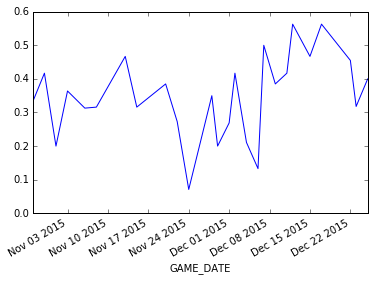

In [20]:
from pandas import DataFrame
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
df = DataFrame.from_dict(labeled_data, orient='index')

fg_pct = df[['GAME_DATE', 'FG_PCT']]
fg_pct = fg_pct.set_index('GAME_DATE')

#df = df.sort_values('Game_ID', ascending=False)
plt.ylabel = 'fg percentage'
plt.xlabel = 'date'
fg_plot = fg_pct['FG_PCT'].plot()